**Example 1**: Let's repeat the study of PCB measurements, this time using classes.

In [2]:
class Coordinate:
    "A simple class to store and manipulate coordinates in two dimension."
    def __init__(self,x,y):
        self.x = int(x)
        self.y = int(y)
    def __str__(self):
        return '({:.2f},{:.2f})'.format(self.x,self.y)
    def __repr__(self):
        return 'Coordinate({:.2f},{:.2f{)'.format(self.x,self.y)
    def __add__(self,other):
        return Coordinate(self.x+other.x,self.y+other.y)
    def __sub__(self,other):
        return Coordinate(self.x-other.x,self.y-other.y)
    def __eq__(self,other):
        return self.x == other.x and self.y == other.y
    def invert(self,axis):
        if 'x' in axis or 'X' in axis: self.x *= -1
        if 'y' in axis or 'Y' in axis: self.y *= -1
    def invertX(self):
        self.invert('x')
    def invertY(self):
        self.invert('y')
    def mag(self):
        return math.sqrt(self.x**2 + self.y**2)
    def __iter__(self):
        yield self.x
        yield self.y
    
class Measurement:
    "A simple class to store a measurement: a label and (x,y) coordinates"
    def __init__(self,label,coordinate):
        self.label = label
        self.coord = coordinate
    @classmethod
    def fromXY(self,label,x,y):
        return Measurement(label,Coordinate(x,y))
    def __str__(self,):
        return '{}: {}'.format(self.label,self.coord)
    def __repr__(self):
        return 'Measurement: {}, {}'.format(self.label,self.coord)
    def __add__(self,other):
        return Measurement(self.label,self.coord+other.coord)
    def __sub__(self,other):
        return Measurement(self.label,self.coord-other.coord)
    def __eq__(self,other):
        return self.label == other.label and self.coord == other.coord
    def x(self):
        return self.coord.x
    def y(self):
        return self.coord.y
    def invert(self,axis):
        self.coord.invert(axis)
    def invertX(self):
        self.invert('x')
    def invertY(self):
        self.invert('y')
    def __iter__(self):
        yield self.label
        yield self.coord
    
class Board:
    "A simple class for storing measurements from a TFPX rev2 module mockup"
    def __init__(self,label, list_of_measurements = []):
        self.label = label
        self.measurements = {m.label:m.coord for m in list_of_measurements}
    def __str__(self):
        return '{}: {}'.format(self.label,self.measurements.keys())
    def __repr__(self):
        return 'Measurement: {}, {}'.format(self.label,self.measurements.keys())
    def addMeasurement(self,measurement):
        self.measurements[measurement.label] = measurement.coord
    def addMeasurementFromCoordinate(self,label,coordinate):
        self.measurements[label] = coordinate
    def addMeasurementFromXY(self,label,x,y):
        self.measurements[label] = Coordinate(x,y)
    def removeMeasurement(self,label):
        del self.measurements[label]
    def shiftMeasurements(self,coord):
        for key in self.measurements.keys(): self.measurements[key] -= coord
    def shiftMeasurementsFromXY(self,x,y):
        self.shiftMeasurements(Coordinate(x,y))
    def getMeasurements(self):
        return [Measurement(key,val) for key,val in self.measurements.items()]
    def getMeasurement(self,label):
        return Measurement(label,self.measurements[label])
    def invertMeasurement(self,label,axis):
        self.measurements[labl].invert(axis)
    def invertMeasurements(self,axis):
        for key in self.measurements.keys(): self.measurements[key].invert(axis)
    def __getitem__(self,key):
        return self.measurements[key]

Let's run these classes through a set of tests to make sure they behave as we expect.  First the coordinate class.

In [3]:
c1 = Coordinate(1,-1)
c2 = Coordinate(2,3)

print('\nc1: ',c1)
print('c2: ',c2)

print('\nc1 equals c2!' if c1 == c2 else '\nc1 not equal to c2!')

c3 = c1 + c2
print('\nc3: ',c3)
c4 = c1 - c2
print('c4: ',c4)
c3 -= c2
print('c3: ',c3)


c1:  (1.00,-1.00)
c2:  (2.00,3.00)

c1 not equal to c2!

c3:  (3.00,2.00)
c4:  (-1.00,-4.00)
c3:  (1.00,-1.00)


And similar for the measurement class.

In [4]:
m1 = Measurement.fromXY('F1',1,-1)
m2 = Measurement('F2',c2)

print('\n',m1,sep='')
print(m2)

print('\nm1 equals m2!' if m1 == m2 else '\nm1 not equal to m2!')

m3 = Measurement.fromXY('m3',1,-1)
m4 = Measurement('m4',c1)
print('\n',m3,sep='')
print(m4)
print('\nm3 equals m4!' if m3 == m4 else '\nm3 not equal to m4!')

m5 = m3 + m4
print('m3 + m4 = ',m5.coord)
m5 = m3 - m4
print('m3 - m4 = ',m5.coord)


F1: (1.00,-1.00)
F2: (2.00,3.00)

m1 not equal to m2!

m3: (1.00,-1.00)
m4: (1.00,-1.00)

m3 not equal to m4!
m3 + m4 =  (2.00,-2.00)
m3 - m4 =  (0.00,0.00)


And finally for the class Board.

In [5]:
b1 = Board('TestBoard')
b1.addMeasurement(m3)
b1.addMeasurementFromCoordinate('m2',Coordinate(2,3))
b1.addMeasurementFromXY('m1',-2,2)
print('\nb1: ', b1)
print(b1.getMeasurements())
print(b1.getMeasurement('m2'))
b1.shiftMeasurements(b1['m3'])
print(b1.getMeasurements())


b1:  TestBoard: dict_keys(['m3', 'm2', 'm1'])
[Measurement: m3, (1.00,-1.00), Measurement: m2, (2.00,3.00), Measurement: m1, (-2.00,2.00)]
m2: (2.00,3.00)
[Measurement: m3, (0.00,0.00), Measurement: m2, (1.00,4.00), Measurement: m1, (-3.00,3.00)]


Let's put it together and read the data in from the file into our new data structures.

In [7]:
import string

infile_name = 'tfpx_board_measurements.csv'
infile = open(infile_name,'r')
lines = infile.readlines()
boards = {}
for line in lines:
    cols = [col.strip(string.whitespace) for col in line.strip(string.whitespace).split(',')]
    if len(cols) != 4: continue
    label_b,label_m,x,y = cols[0],cols[1],cols[2],cols[3]
    if label_b not in boards: boards[label_b] = Board(label_b)
    boards[label_b].addMeasurementFromXY(label_m,x,y)
    
infile.close()
print('Read in {} boards from {}.'.format(len(boards),infile_name))

Read in 9 boards from tfpx_board_measurements.csv.


Now that the data is read in let's plot the measured coordinates using a different color for each board.

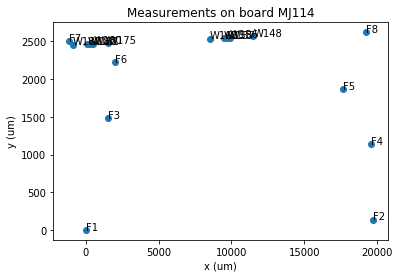

In [14]:
import numpy as np
import matplotlib.pyplot as plt

list_of_boards = list(boards.values())
if len(list_of_boards) == 0:
    print('No measurements are available. Exiting.')
else:
    measurements = list_of_boards[0].getMeasurements()
    x = np.array([m.x() for m in measurements])
    y = np.array([m.y() for m in measurements])
    fig, ax = plt.subplots()
    ax.plot(x,y,'o')
    for x,y,label in list(zip(x,y,[m.label for m in measurements])):
        ax.annotate(label,(x+1,y+1))
    ax.set_xlabel('x (um)')
    ax.set_ylabel('y (um)')
    ax.set_title('Measurements on board MJ114')
plt.show()

Let's try plotting the measurements from two boards and print out the coordinates of *F1* for each board.

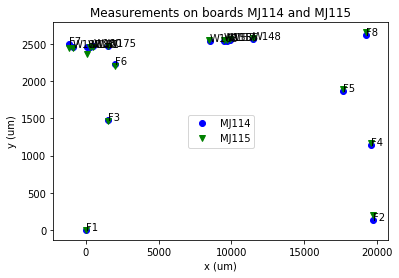

MJ114: F1(0,0)
MJ115: F1(0,0)


In [17]:
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
markers = list(Line2D.markers.keys())
colors = list(mcolors.BASE_COLORS.keys())

measurements = [board.getMeasurements() for board in list_of_boards[:2]]
xs = []
ys = []
for l_of_m in measurements:
    xs.append(np.array([m.x() for m in l_of_m]))
    ys.append(np.array([m.y() for m in l_of_m]))

labels = [m.label for m in measurements[0]]
              
fig, ax = plt.subplots()
for index,(x,y) in enumerate(list(zip(xs,ys))):
    ax.plot(x,y,markers[index+2]+colors[index],label=list_of_boards[index].label)
for x,y,label in list(zip(xs[0],ys[0],labels)):
    ax.annotate(label,(x,y))
ax.set_xlabel('x (um)')
ax.set_ylabel('y (um)')
ax.set_title('Measurements on boards {} and {}'.format(list_of_boards[0].label,list_of_boards[1].label))
plt.legend(loc='center')
plt.show()

label_m = 'F1'
for index in range(2):
    board = list_of_boards[index]
    measurement = board.getMeasurement(label_m)
    print('{}: {}({},{})'.format(board.label,label_m,measurement.x(),measurement.y()))

When comparing measurements between two boards, we should be careful that the origin may not be the same.  This doesn't matter for comparing distances between two points on the same board across all of the boards, but it does for comparing absolute coordinates.  We can establish a common coordinate system by transforming the coordinates for each board such that 'F1' is the origin, i.e. (X,Y) --> (X-X_F1,Y_F1), where (X_F1,Y_F1) are the coordinates 'F1' for this board. You can't tell from the plots, but the source of data has a different convention for the positive y-direction than we're using, so let's also invert the y-coordinates, i.e. Y --> -Y.

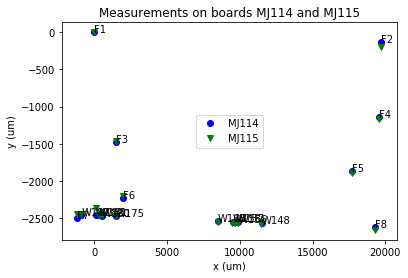

MJ114: F1(0,0)
MJ115: F1(0,0)


In [20]:
for board in list(boards.values()):
    board.shiftMeasurements(board.getMeasurement(label_m).coord)
    board.invertMeasurements('y')

measurements = [board.getMeasurements() for board in list_of_boards[:2]]
xs = []
ys = []
for l_of_m in measurements:
    xs.append(np.array([m.x() for m in l_of_m]))
    ys.append(np.array([m.y() for m in l_of_m]))

fig, ax = plt.subplots()
for index,(x,y) in enumerate(list(zip(xs,ys))):
    ax.plot(x,y,markers[index+2]+colors[index],label=list_of_boards[index].label)
for x,y,label in list(zip(xs[0],ys[0],labels)):
    ax.annotate(label,(x,y))
ax.set_xlabel('x (um)')
ax.set_ylabel('y (um)')
ax.set_title('Measurements on boards {} and {}'.format(list_of_boards[0].label,list_of_boards[1].label))
plt.legend(loc='center')
plt.show()

for index in range(2):
    board = list_of_boards[index]
    measurement = board.getMeasurement(label_m)
    print('{}: {}({},{})'.format(board.label,label_m,measurement.x(),measurement.y()))

From the figure it looks as though any differences are small.  That's good.  Let's print all of the measurements for the two boards side-by-side to see what differences there are.

In [22]:
m0 = list_of_boards[0].getMeasurements()
m1 = list_of_boards[1].getMeasurements()
for index,m in enumerate(m0):
    if index == 0:
        print('{}\t\t{}\t\t\t{}'.format('Measurement',list_of_boards[0].label,list_of_boards[1].label))
    m_ = m1[index]
    sep = '\t\t\t' if index == 0 else '\t\t'
    print('{}\t\t\t({},{})'.format(m.label,m.x(),m.y())+sep+'({},{})'.format(m_.x(),m_.y()))

Measurement		MJ114			MJ115
F1			(0,0)			(0,0)
F2			(19730,-136)		(19728,-202)
F3			(1527,-1482)		(1531,-1468)
F4			(19574,-1138)		(19574,-1170)
F5			(17700,-1872)		(17696,-1890)
F6			(2010,-2226)		(2014,-2202)
F7			(-1169,-2506)		(-1167,-2444)
F8			(19264,-2622)		(19262,-2660)
W148			(11499,-2573)		(11495,-2579)
W156			(9903,-2550)		(9898,-2564)
W157			(9705,-2548)		(9702,-2561)
W158			(9507,-2547)		(9498,-2561)
W163			(8506,-2539)		(8501,-2550)
W175			(1515,-2475)		(1510,-2470)
W180			(516,-2472)		(511,-2460)
W181			(319,-2462)		(315,-2459)
W182			(117,-2463)		(113,-2361)
W187			(-880,-2459)		(-885,-2442)


So indeed there are some small differences, but nothing too different. We're primarily interested in measurements whose labels begin with *W*.  For each measurement whose label begins with a *W*, let's plot separately the x- and y-coordinate of that measurements for each board.

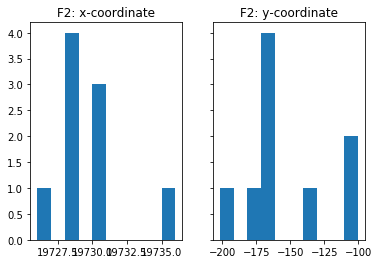

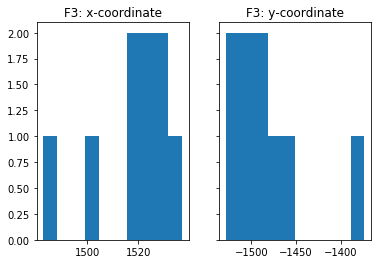

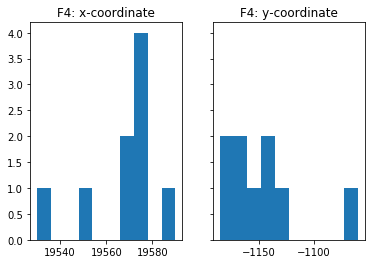

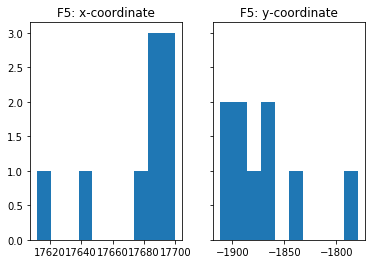

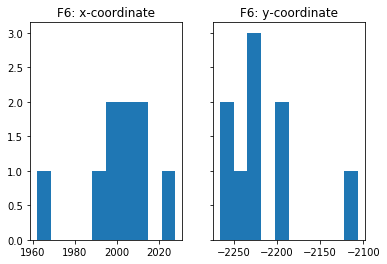

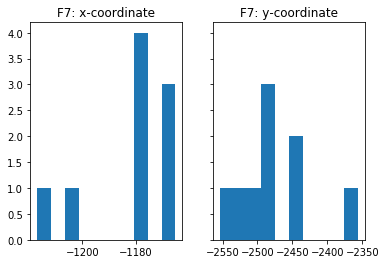

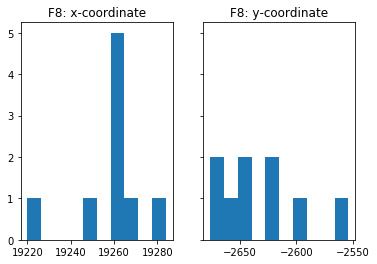

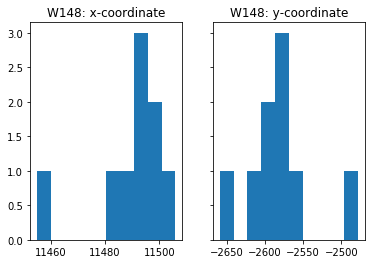

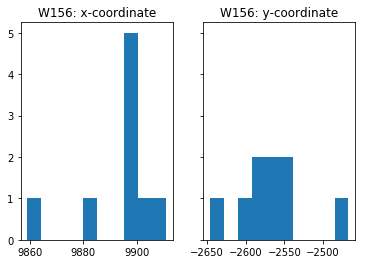

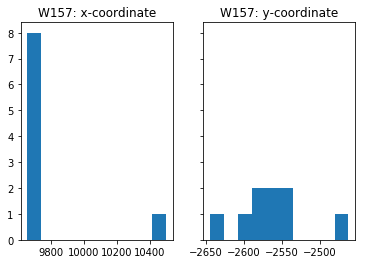

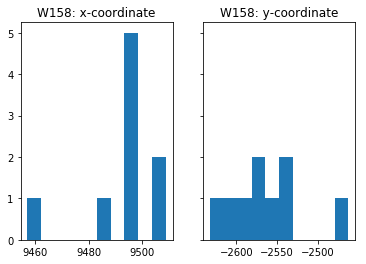

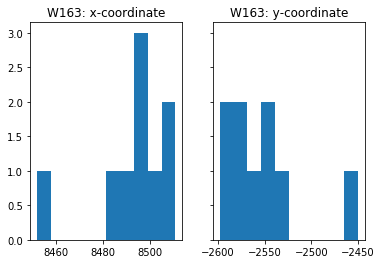

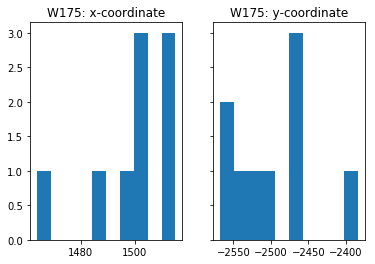

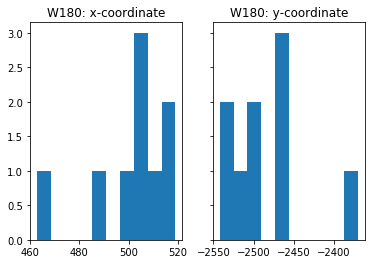

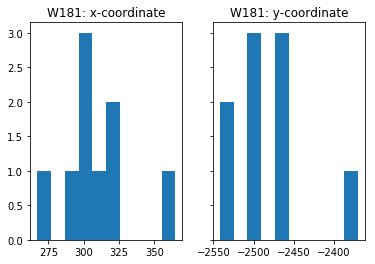

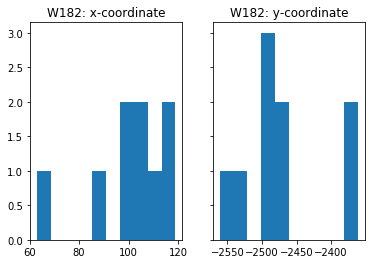

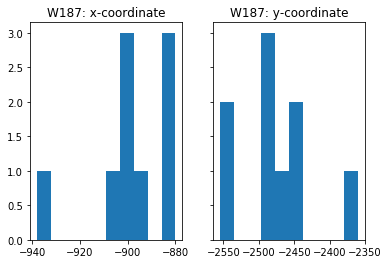

In [24]:
for label in labels:
    if label == 'F1': continue
    xs = np.array([board.getMeasurement(label).x() for board in list_of_boards])
    ys = np.array([board.getMeasurement(label).y() for board in list_of_boards])
    f, (ax1,ax2) = plt.subplots(1,2,sharey=True)
    n1, bins1, patches1 = ax1.hist(xs)
    ax1.set_title(label+': x-coordinate')
    n2, bins2, patches2 = ax2.hist(ys)
    ax2.set_title(label+': y-coordinate')
    plt.show()

**Example 2**: 